<a href="https://colab.research.google.com/github/Sg134-ch/Machine-Learning-Projects-/blob/main/whatsapp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import re
import pandas as pd

In [6]:
f = open('WhatsApp Chat with TE CMPN 2k27.txt','r',encoding = 'utf-8')

In [7]:
data = f.read()

In [8]:
print(data)

01/09/25, 23:40 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
02/09/25, 20:30 - +91 93215 51457: This message was deleted
03/09/25, 13:21 - Your security code with +91 70219 68362 changed. Tap to learn more.
06/09/25, 11:40 - +91 93569 44763: Follow this link to join my WhatsApp group: https://chat.whatsapp.com/I16EiWEn2fZJRTPpRkFxnd?mode=ems_share_t
06/09/25, 11:43 - +91 93569 44763: This is the official group where all the info is being provided 
Incase if y'all are lookin ng for teammates you can msg in this grp (don't spam) 
Keep your format as mentioned 
*Sample Format* (for posting your requirements):

Name : [Your Name]

Branch/Year : [Your Branch & Year]

Skills : [Your key skills/technologies you know]

Looking For : [Type of team members you need – e.g., frontend, backend, designer, etc.]

Contact: [Your preferred contact detail – optional]
11/09/25, 16:38 - Your security code with +91 84519 16094 chang

In [9]:
pattern = r"(\d{2}/\d{2}/\d{2}, \d{2}:\d{2} - )"

In [10]:
messages = re.split(pattern, data)[1:]
len(messages)

512

In [11]:
messages

['01/09/25, 23:40 - ',
 'Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 '02/09/25, 20:30 - ',
 '+91 93215 51457: This message was deleted\n',
 '03/09/25, 13:21 - ',
 'Your security code with +91 70219 68362 changed. Tap to learn more.\n',
 '06/09/25, 11:40 - ',
 '+91 93569 44763: Follow this link to join my WhatsApp group: https://chat.whatsapp.com/I16EiWEn2fZJRTPpRkFxnd?mode=ems_share_t\n',
 '06/09/25, 11:43 - ',
 "+91 93569 44763: This is the official group where all the info is being provided \nIncase if y'all are lookin ng for teammates you can msg in this grp (don't spam) \nKeep your format as mentioned \n*Sample Format* (for posting your requirements):\n\nName : [Your Name]\n\nBranch/Year : [Your Branch & Year]\n\nSkills : [Your key skills/technologies you know]\n\nLooking For : [Type of team members you need – e.g., frontend, backend, designer, etc.]\n\nContact: [Your preferred contact detail – optional]

In [12]:
parts = re.split(pattern, data)
dates = parts[1::2]
messages = parts[2::2]

print("Dates:", len(dates))
print("Messages:", len(messages))

df = pd.DataFrame({"user_message": messages,"message_date": dates})

df["message_date"] = pd.to_datetime(df["message_date"], format="%d/%m/%y, %H:%M - ")

df.rename(columns={"message_date": "date"}, inplace=True)

df.head()

Dates: 256
Messages: 256


,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2025-09-01 23:40:00
1,+91 93215 51457: This message was deleted\n,2025-09-02 20:30:00
2,Your security code with +91 70219 68362 change...,2025-09-03 13:21:00
3,+91 93569 44763: Follow this link to join my W...,2025-09-06 11:40:00
4,+91 93569 44763: This is the official group wh...,2025-09-06 11:43:00


In [13]:
df.shape

(256, 2)

In [14]:
# ✅ Separate users and messages correctly

users = []
messages = []

for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s', message)

    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append("group_notification")
        messages.append(entry[0])

df["user"] = users
df["message"] = messages

# ✅ Drop old column after extraction
df.drop(columns=["user_message"], inplace=True)

df.head()


,date,user,message
0,2025-09-01 23:40:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2025-09-02 20:30:00,+91 93215 51457,This message was deleted\n
2,2025-09-03 13:21:00,group_notification,Your security code with +91 70219 68362 change...
3,2025-09-06 11:40:00,+91 93569 44763,
4,2025-09-06 11:43:00,+91 93569 44763,


In [15]:
df['year'] = df['date'].dt.year

In [16]:
df.head(20)

,date,user,message,year
0,2025-09-01 23:40:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025
1,2025-09-02 20:30:00,+91 93215 51457,This message was deleted\n,2025
2,2025-09-03 13:21:00,group_notification,Your security code with +91 70219 68362 change...,2025
3,2025-09-06 11:40:00,+91 93569 44763,,2025
4,2025-09-06 11:43:00,+91 93569 44763,,2025
5,2025-09-11 16:38:00,group_notification,Your security code with +91 84519 16094 change...,2025
6,2025-09-12 06:58:00,group_notification,Your security code with ~ Amritesh changed. Ta...,2025
7,2025-09-13 17:45:00,+91 93215 51457,,2025
8,2025-09-13 17:45:00,+91 93215 51457,Message from Divya ma'am\n,2025
9,2025-09-13 18:02:00,+91 93215 51457,Kindly mute your outlook notifications for 5 m...,2025


In [17]:
df['month'] = df['date'].dt.month_name()

In [18]:
df['day'] = df['date'].dt.day

In [19]:
df['hour'] = df['date'].dt.hour

In [20]:
df['minute'] = df['date'].dt.minute

In [21]:
df.head(20)

,date,user,message,year,month,day,hour,minute
0,2025-09-01 23:40:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,September,1,23,40
1,2025-09-02 20:30:00,+91 93215 51457,This message was deleted\n,2025,September,2,20,30
2,2025-09-03 13:21:00,group_notification,Your security code with +91 70219 68362 change...,2025,September,3,13,21
3,2025-09-06 11:40:00,+91 93569 44763,,2025,September,6,11,40
4,2025-09-06 11:43:00,+91 93569 44763,,2025,September,6,11,43
5,2025-09-11 16:38:00,group_notification,Your security code with +91 84519 16094 change...,2025,September,11,16,38
6,2025-09-12 06:58:00,group_notification,Your security code with ~ Amritesh changed. Ta...,2025,September,12,6,58
7,2025-09-13 17:45:00,+91 93215 51457,,2025,September,13,17,45
8,2025-09-13 17:45:00,+91 93215 51457,Message from Divya ma'am\n,2025,September,13,17,45
9,2025-09-13 18:02:00,+91 93215 51457,Kindly mute your outlook notifications for 5 m...,2025,September,13,18,2


In [22]:
df[df['user'] == 'Gaurav Deore Vit C'].shape

(2, 8)

In [23]:
words = []
for message in df['message']:
    words.extend(message.split())

In [24]:
len(words)

3096

In [25]:
pip install urlextract

In [26]:
from urlextract import URLExtract

In [27]:
extractor = URLExtract()
urls = extractor.find_urls(
    "Let's www.gmail.com have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in")
urls

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [28]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [29]:
links

['https://teams.microsoft.com/l/meetup-join/19%3ameeting_ZDRkZjQ3ZTUtMGYyZi00NzY0LWE4YTgtNDY3Y2IyNzBlMDVl%40thread.v2/0?context=%7b%22Tid%22%3a%22c7b00d7f-ad99-442a-b12f-c2c912044fdc%22%2c%22Oid%22%3a%22248cbd1e-a700-4a75-b6fd-c2c79cf76744%22%7d',
 'https://youtu.be/KpD74F59vk0',
 'https://unstop.com/hackathons/codeissance-2025-thadomal-shahani-engineering-college-tsec-mumbai-1553431',
 'https://youtu.be/ckSr1y6MH4U?feature=shared',
 'https://tinyurl.com/3wk4z3xw',
 'https://www.instagram.com/reel/DQUJd5PDMzR/?igsh=MXRiYWpvcjZwNGh2aw==',
 'https://tinyurl.com/3uxtx93c',
 'https://teams.microsoft.com/l/meetup-join/19%3ameeting_YTcwMGVhNDMtZjEzYS00MGMwLTlkZTctNmZkODhmYmY1Yzdj%40thread.v2/0?context=%7b%22Tid%22%3a%22c7b00d7f-ad99-442a-b12f-c2c912044fdc%22%2c%22Oid%22%3a%2235e89f53-4c58-407a-882d-9a01ad0929d4%22%7d',
 'https://www.instagram.com/reel/DRfEpSQjHL2/?igsh=MWFwYzJseXg0dGZpOQ==']

In [30]:
len(links)

9

In [31]:
df

,date,user,message,year,month,day,hour,minute
0,2025-09-01 23:40:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,September,1,23,40
1,2025-09-02 20:30:00,+91 93215 51457,This message was deleted\n,2025,September,2,20,30
2,2025-09-03 13:21:00,group_notification,Your security code with +91 70219 68362 change...,2025,September,3,13,21
3,2025-09-06 11:40:00,+91 93569 44763,,2025,September,6,11,40
4,2025-09-06 11:43:00,+91 93569 44763,,2025,September,6,11,43
...,...,...,...,...,...,...,...,...
251,2026-01-20 20:50:00,group_notification,Your security code with ~ Mubina changed. Tap ...,2026,January,20,20,50
252,2026-01-20 22:25:00,group_notification,Your security code with ~ Adrian changed. Tap ...,2026,January,20,22,25
253,2026-01-21 09:03:00,+91 93569 44763,<Media omitted>\n,2026,January,21,9,3
254,2026-01-26 21:14:00,Tanisha Sharma Vit,<Media omitted>\n,2026,January,26,21,14


In [32]:
df['user'].value_counts()

,count
user,
group_notification,73
+91 93215 51457,40
Srishti Yadav Vit,18
+91 97024 35432,16
+91 93569 44763,11
Mrugi,7
+91 93216 66755,6
+91 90047 20162,6
+91 70210 85639,5


In [33]:
df['user'].value_counts().head()

,count
user,
group_notification,73
+91 93215 51457,40
Srishti Yadav Vit,18
+91 97024 35432,16
+91 93569 44763,11


In [34]:
import matplotlib.pyplot as plt

In [35]:
x = df['user'].value_counts().head()

In [36]:
name = x.index
count = x.values

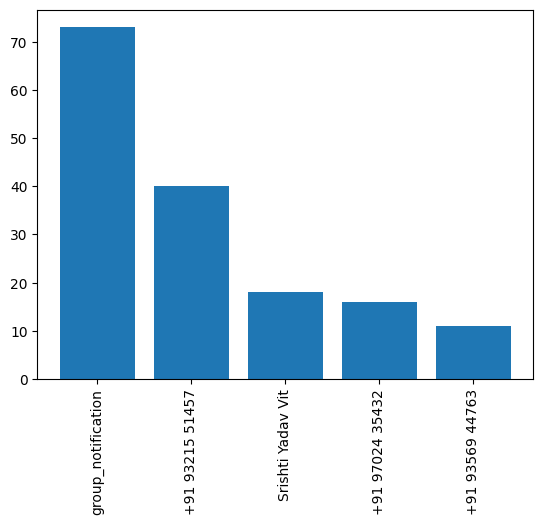

In [37]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [38]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = {'user':'name','count':'percent'})

,name,percent
0,group_notification,28.52
1,+91 93215 51457,15.62
2,Srishti Yadav Vit,7.03
3,+91 97024 35432,6.25
4,+91 93569 44763,4.30
5,Mrugi,2.73
6,+91 93216 66755,2.34
7,+91 90047 20162,2.34
8,+91 70210 85639,1.95
9,Tanisha Sharma Vit,1.56


In [39]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message']!='<Media omitted>\n']

In [40]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()

In [41]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [42]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,21
1,project,16
2,final,13
3,year,12
4,deleted,11
5,session,11
6,<this,9
7,edited>,9
8,join,8
9,interested,8


In [43]:
pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [44]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 21.1 MB/s eta 0:00:00


In [45]:
import emoji

In [46]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [47]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,📌,6
1,🫡,3
2,📍,3
3,✨,3
4,📢,2
5,😂,2
6,💻,1
7,❤,1
8,😭,1
9,💀,1


In [48]:
df['month_num'] = df['date'].dt.month

In [49]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [50]:
timeline

,year,month_num,month,message
0,2025,9,September,66
1,2025,10,October,64
2,2025,11,November,57
3,2025,12,December,25
4,2026,1,January,44


In [51]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + " - " + str(timeline['year'][i]))

In [52]:
time

['September - 2025',
 'October - 2025',
 'November - 2025',
 'December - 2025',
 'January - 2026']

In [53]:
timeline['time'] = time

In [54]:
timeline

,year,month_num,month,message,time
0,2025,9,September,66,September - 2025
1,2025,10,October,64,October - 2025
2,2025,11,November,57,November - 2025
3,2025,12,December,25,December - 2025
4,2026,1,January,44,January - 2026


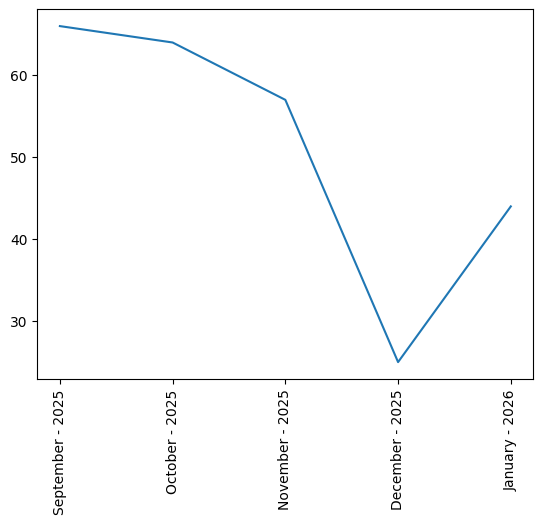

In [55]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df['only_date'] = df['date'].dt.date

In [57]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

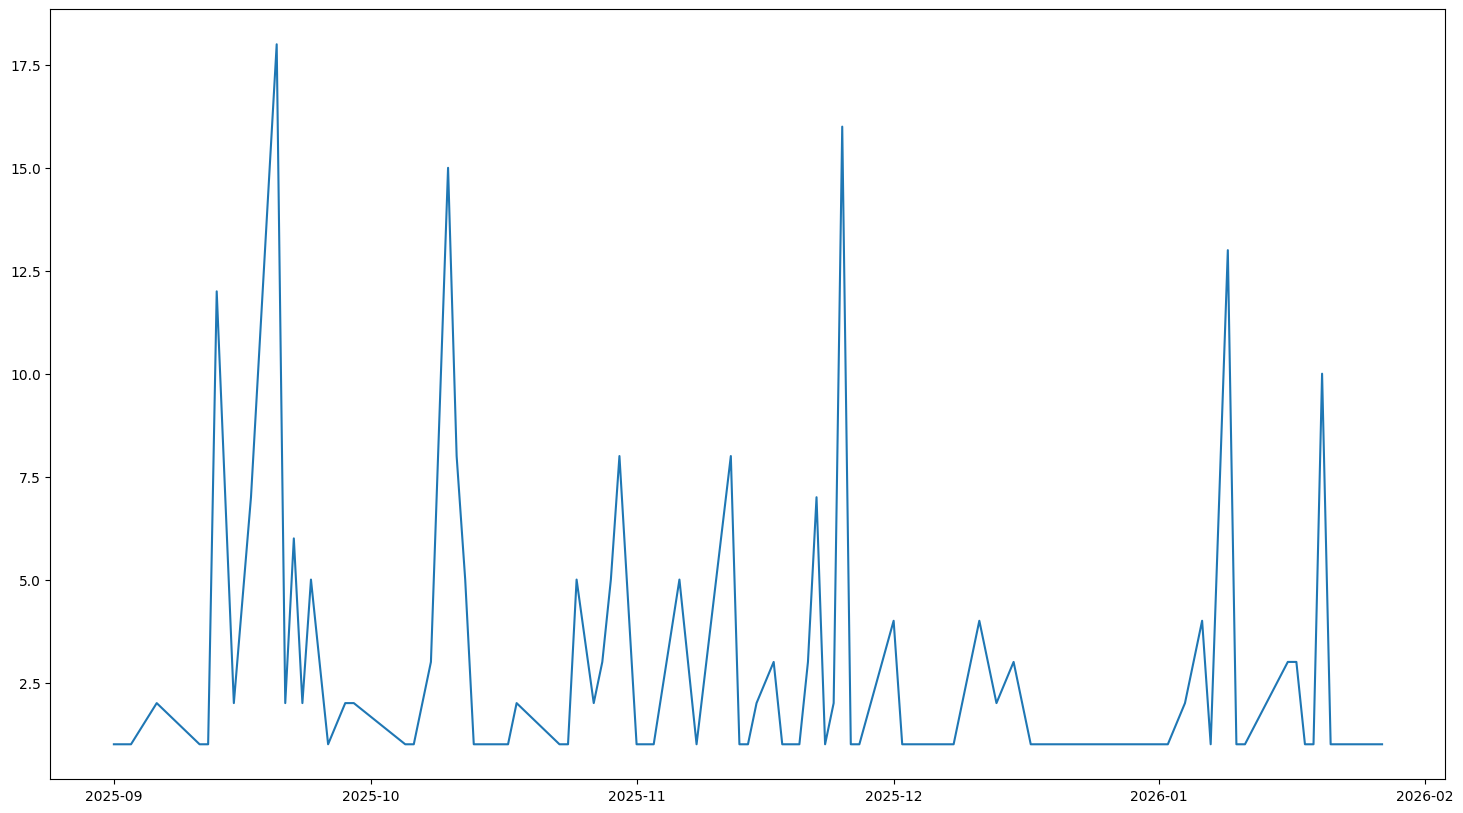

In [58]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [59]:
df['day_name'] = df['date'].dt.day_name()

In [60]:
df['day_name'].value_counts()

,count
day_name,
Saturday,66
Friday,42
Tuesday,40
Wednesday,35
Monday,33
Thursday,23
Sunday,17


In [61]:
df['month'].value_counts()

,count
month,
September,66
October,64
November,57
January,44
December,25


In [62]:
period = []

for hour in df['hour']:

    if hour == 23:
        period.append(str(hour) + "-" + str("00"))

    elif hour == 0:
        period.append(str("00") + "-" + str(hour+1))

    else:
        period.append(str(hour) + "-" + str(hour+1))

In [63]:
df['period'] = period

In [64]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
146,2025-11-13 10:30:00,+91 98695 02400,,2025,November,13,10,30,11,2025-11-13,Thursday,10-11
28,2025-09-20 15:03:00,+91 93215 51457,Reminder\n,2025,September,20,15,3,9,2025-09-20,Saturday,15-16
158,2025-11-21 18:37:00,+91 97024 35432,📌 Expert Sessions – Common Instructions\n\nAtt...,2025,November,21,18,37,11,2025-11-21,Friday,18-19
164,2025-11-22 18:41:00,Srishti Yadav Vit,Thank god\n,2025,November,22,18,41,11,2025-11-22,Saturday,18-19
214,2026-01-04 16:20:00,group_notification,Your security code with ~ Tanisha changed. Tap...,2026,January,4,16,20,1,2026-01-04,Sunday,16-17


In [65]:
pip install seaborn

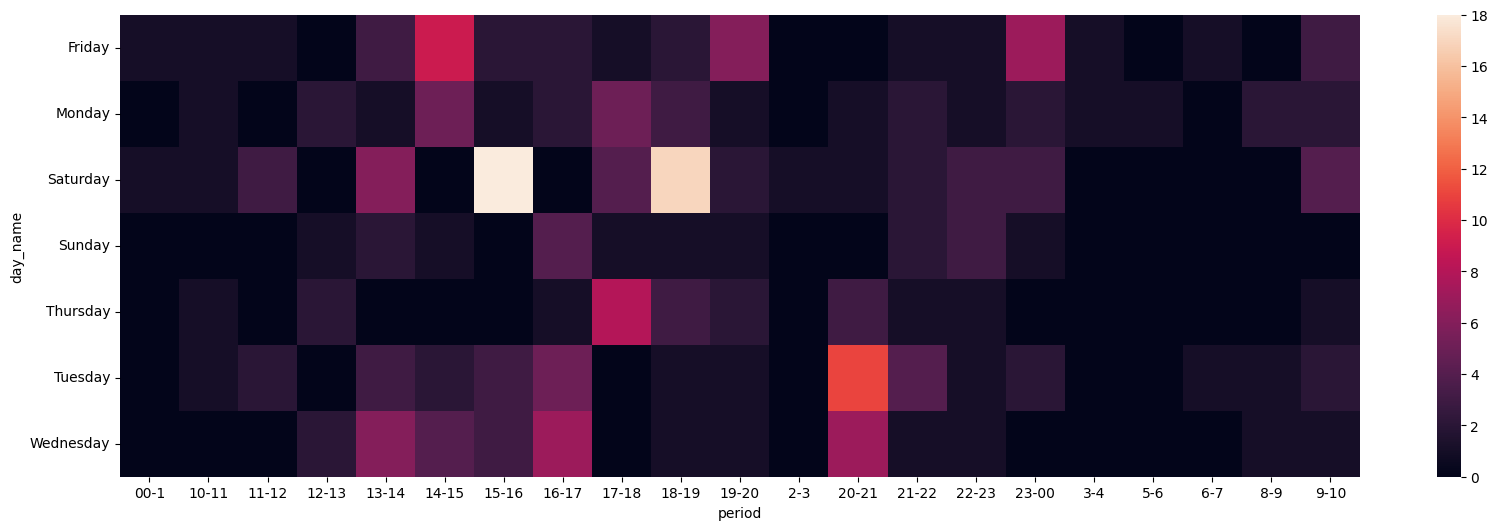

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

sns.heatmap(
    df.pivot_table(
        index='day_name',
        columns='period',
        values='message',
        aggfunc='count'
    ).fillna(0)
)

plt.yticks(rotation='horizontal')
plt.show()

In [67]:
df.pivot_table(
        index='day_name',
        columns='period',
        values='message',
        aggfunc='count'
    )

period,00-1,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,...,2-3,20-21,21-22,22-23,23-00,3-4,5-6,6-7,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,1.0,1.0,1.0,NaN,3.0,9.0,2.0,2.0,1.0,2.0,...,NaN,NaN,1.0,1.0,7.0,1.0,NaN,1.0,NaN,3.0
Monday,NaN,1.0,NaN,2.0,1.0,5.0,1.0,2.0,5.0,3.0,...,NaN,1.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,2.0
Saturday,1.0,1.0,3.0,NaN,6.0,NaN,18.0,NaN,4.0,17.0,...,1.0,1.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,4.0
Sunday,NaN,NaN,NaN,1.0,2.0,1.0,NaN,4.0,1.0,1.0,...,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
Thursday,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.0,8.0,3.0,...,NaN,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
Tuesday,NaN,1.0,2.0,NaN,3.0,2.0,3.0,5.0,NaN,1.0,...,NaN,11.0,4.0,1.0,2.0,NaN,NaN,1.0,1.0,2.0
Wednesday,NaN,NaN,NaN,2.0,6.0,4.0,3.0,7.0,NaN,1.0,...,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
